In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Nodes: [0, 1, 2, 3, 4, 5]
Edges: [(0, 1), (0, 2), (3, 4), (4, 5)]


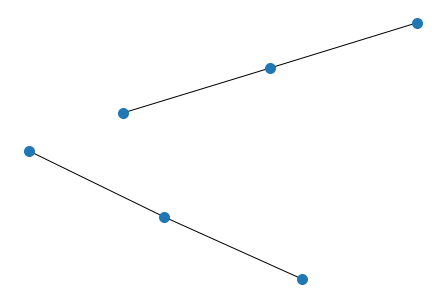

In [6]:
class Graph():
    def __init__(self):
        self.gdict = {}
         
    def add_node(self, node):
        if node not in self.gdict:
            self.gdict[node] = []
            #self.nodes.append(node)
    
    def add_edge(self, node1, node2):
        self.add_node(node1)
        self.add_node(node2)
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
    def nodes(self):
        """Returns a list of nodes,"""
        return list(self.gdict.keys())
        
    def edges(self):
        """Returns a list of edges,"""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if link>node:
                    out.append((node,link))
        return out
        
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ":" +str(self.gdict[node]) + '\n'
        return out    #str(self.gdict)
    
    def plot (self):
        g_nx = nx.Graph()
        g_nx.add_nodes_from(self.nodes())
        g_nx.add_edges_from(self.edges())
        nx.draw_kamada_kawai(g_nx, node_size = 100)


g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(3,4)
g.add_edge(4,5)
#print(g)
print("Nodes:", g.nodes())
print("Edges:", g.edges())
g.plot()

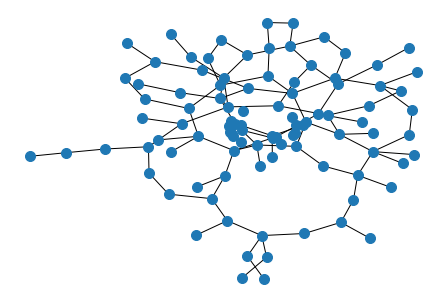

In [7]:
N_NODES = 100
N_EDGES = N_NODES

g = Graph()
for i in range(N_NODES):
    g.add_node(i)
    
edges = []
while len(edges) <N_EDGES:
    n1 = np.random.randint(low = 0, high = N_NODES)
    n2 = np.random.randint(low = 0, high = N_NODES)
    if n2<n1:
        n1,n2 = n2,n1
    
    if (n1,n2) not in edges and n1!=n2:
        g.add_edge(n1,n2)
        edges.append((n1,n2))
    
#print(g)
g.plot()

[3, 1, 0, 2, 3, 3, 4, 1, 0, 2, 1, 2, 2, 3, 2, 2, 4, 2, 3, 4, 4, 2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 2, 4, 3, 3, 0, 5, 3, 4, 3, 1, 1, 3, 3, 1, 0, 1, 1, 4, 0, 1, 1, 4, 4, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1, 1, 4, 3, 2, 4, 3, 2, 2, 1, 3, 1, 2, 2, 1, 2, 1, 2, 3, 0, 3, 1, 1, 2, 2, 1, 1, 3, 0, 5, 0, 1, 3, 3, 2]


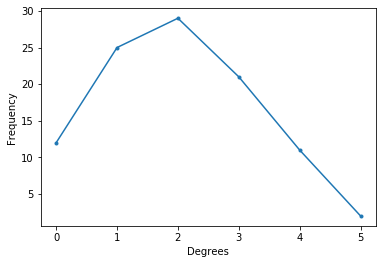

In [11]:
degrees = []
for node,links in g.gdict.items():
    degrees.append(len(links))
    
print(degrees)

hist = np.zeros(max(degrees)+1)
for d in degrees:
    hist[d] +=1

plt.plot(hist,'.-');
plt.xlabel("Degrees");
plt.ylabel("Frequency");